In [ ]:
!pip install tensorflow-tensorboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 889.3/889.3 KB 49.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for html5lib: filename=html5lib-0.9999999-py3-none-any.whl size=107233 sha256=db726450826decc33534db6403b1995b053db51eb669fdfc686a19a0a8f7de48
  Stored in directory: /root/.cache/pip/wheels/dc/75/d2/3812ab8ba1fff9d3a0ed5bfc472174c9312055b1b80a94834b
Successfully built html5lib
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: bleach
    Found existing installation: bleach 5.0.1
    Uninstalling bleach-5.0.1:
      Successfully uninstalled bleach-5.0.1


In [ ]:
import gensim
from gensim.models import KeyedVectors

# Load word2vec models
model_1 = KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaLatina.vec.txt', binary=False)
model_2 = KeyedVectors.load_word2vec_format('https://embeddings.lila-erc.eu/samples/download/aligned/OperaMaiora.vec.txt', binary=False)


To count the change in meaning of a word across different word2vec models in Python, you will first need to obtain the word2vec models that you want to compare. You can use the gensim library to load the models from file.

Once you have the models loaded, you can retrieve the word vectors for a specific word in each model using the word_vec method. For example:

In [ ]:
wrd = "regnum"
word_vec_1 = model_1.word_vec(wrd)
word_vec_2 = model_2.word_vec(wrd)

In [ ]:
word_vec_1 = model_1.word_vec("regnum")
word_vec_2 = model_2.word_vec("regnum")

In [ ]:
# get numpy vector of a word
word_vec_1 = model_1.wv['gens']
word_vec_2 = model_2.wv['gens']

<ipython-input-5-5e41665f6f10>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  word_vec_1 = model_1.wv['gens']
<ipython-input-5-5e41665f6f10>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  word_vec_2 = model_2.wv['gens']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

words = ["gens", "populus", "natio", "uulgus", "genus", "stirps",  "plebs", "ciuis", "ciuitas", "turba", "patricius", "tumultus", "regnum", "lingua", "familia"]

#words = ["gens", "populus", "natio", "uulgus", "genus", "plebs", "ciuitas", "turba", "patricius", "regnum", "tumultus", "familia"]

#words = ["gens", "populus", "natio", "uulgus"]


for wrd in words:
    word_vec_1 = model_1.word_vec(wrd);
    word_vec_2 = model_2.word_vec(wrd);
    similarity = cosine_similarity([word_vec_1], [word_vec_2])[0][0];
    print(wrd, similarity)

gens 0.1089945
populus -0.14469315
natio -0.013743182
uulgus 0.018742653
genus 0.1000886
stirps -0.045451365
plebs -0.1035857
ciuis -0.034892637
ciuitas -0.19689292
turba 0.042004
patricius -0.010791831
tumultus -0.004233234
regnum -0.034337886
lingua 0.019548416
familia -0.086470164


In [ ]:
for wrd in words:
    sims_1 = model_1.wv.most_similar(wrd, topn=10);
    sims_2 = model_2.wv.most_similar(wrd, topn=10);
    print(wrd, "1:", sims_1)
    print(wrd, "2:", sims_2)

gens 1: [('regens', 0.6138488054275513), ('scythae', 0.5793613195419312), ('natio', 0.5635300278663635), ('mardi', 0.5634660124778748), ('illyrii', 0.5383574962615967), ('iudaei', 0.5338514447212219), ('alienigena', 0.5225402116775513), ('sarmatae', 0.5208836793899536), ('brigantes', 0.5183442234992981), ('perdomo', 0.5178052186965942)]
gens 2: [('iudaicus', 0.569577693939209), ('gentilis', 0.5592577457427979), ('iudaeus', 0.5586758852005005), ('natio', 0.5583958625793457), ('primitiuus', 0.5581321716308594), ('gentilitas', 0.5195542573928833), ('disperdo', 0.5178202390670776), ('princeps', 0.517543375492096), ('alienigenus', 0.5008281469345093), ('lex', 0.5007472038269043)]
populus 1: [('romanus', 0.5604466199874878), ('ciuis', 0.5572011470794678), ('popularis', 0.5369052886962891), ('populatio', 0.534020721912384), ('populariter', 0.5179181694984436), ('populo', 0.5158695578575134), ('decemuir', 0.5055531859397888), ('foederatus', 0.49127769470214844), ('senatus', 0.4864126741886139)

<ipython-input-17-0a28c7f28500>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  sims_1 = model_1.wv.most_similar(wrd, topn=10);
<ipython-input-17-0a28c7f28500>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  sims_2 = model_2.wv.most_similar(wrd, topn=10);


To compare the meaning of the word in the two models, you can use a measure of similarity between the vectors, such as the cosine similarity. You can use the sklearn library to compute the cosine similarity between the two vectors:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity([word_vec_1], [word_vec_2])[0][0]
print(similarity)

-0.086470164


To compare the meaning of the word in the two models, you can use a measure of similarity between the vectors, such as the cosine similarity. You can use the sklearn library to compute the cosine similarity between the two vectors:

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity([word_vec_1], [word_vec_2])[0][0]
print(similarity)

-0.086470164


Cosine similarity is a measure of the similarity between two vectors that is commonly used when analyzing word embeddings. It is calculated as the cosine of the angle between the two vectors, and is a value between 0 and 1, where 0 indicates that the vectors are orthogonal (i.e., not similar) and 1 indicates that the vectors are identical.

When analyzing semantic shift, cosine similarity can be used to compare the meanings of words at different points in time. For example, if you are analyzing the semantic shift of a word over time, you could calculate the cosine similarity between the word embeddings for the word at different points in time. A high cosine similarity between the word embeddings would indicate that the meaning of the word has remained relatively stable over time, while a low cosine similarity would indicate that the meaning of the word has changed significantly.

Are negative values of cosine similarity possible?
Technically, it is possible for cosine similarity to be negative, although this is uncommon in practice. Cosine similarity is calculated as the cosine of the angle between two vectors, and the cosine function can take on values between -1 and 1. However, when calculating cosine similarity, it is typically normalized so that the values are always between 0 and 1, with 0 indicating that the vectors are orthogonal (i.e., not similar) and 1 indicating that the vectors are identical.

Negative values of cosine similarity can occur when the angle between the vectors is greater than 90 degrees, but this is generally not interpreted as indicating similarity between the vectors. Instead, negative values of cosine similarity are typically interpreted as indicating dissimilarity or orthogonality between the vectors.

It is important to note that cosine similarity is just one measure of vector similarity, and there are other measures that may be more appropriate depending on the specific research question and context. It is also important to consider the limitations of cosine similarity and to interpret the results in the context of the broader research goals and the data being analyzed.


The resulting similarity score will be a value between 0 and 1, where a value of 1 indicates that the word has the same meaning in both models, and a value of 0 indicates that the word has a completely different meaning in the two models.

Результирующая оценка сходства будет иметь значение от 0 до 1, где значение 1 указывает, что слово имеет одинаковое значение в обеих моделях, а значение 0 указывает на то, что слово имеет совершенно разное значение в двух моделях.

Возможны ли отрицательные значения подобия косинусов?
Технически сходство косинусов может быть отрицательным, хотя на практике это редкость. Косинусное сходство вычисляется как косинус угла между двумя векторами, а функция косинуса может принимать значения от -1 до 1. Однако при вычислении косинусного сходства оно обычно нормализуется, так что значения всегда находятся в диапазоне от 0 до 1. где 0 указывает, что векторы ортогональны (т. е. не похожи), а 1 указывает, что векторы идентичны.

Отрицательные значения косинусного подобия могут возникать, когда угол между векторами больше 90 градусов, но обычно это не интерпретируется как указание на сходство между векторами. Вместо этого отрицательные значения сходства косинусов обычно интерпретируются как указывающие на несходство или ортогональность между векторами.

In [ ]:
# Tutorial
# https://radimrehurek.com/gensim/models/word2vec.html

vector = model_1.wv['gens']  # get numpy vector of a word
print(vector)

sims = model_1.wv.most_similar('natio', topn=10)  # get other similar words
sims

[ 6.540e-02 -1.786e-01 -6.120e-02 -3.870e-02  1.689e-01  5.850e-02
 -4.710e-02 -6.340e-02  1.741e-01 -1.462e-01 -1.008e-01 -6.550e-02
  1.067e-01 -9.320e-02 -5.700e-03 -2.940e-02 -5.300e-02 -1.019e-01
 -1.770e-02  1.010e-01  2.510e-02  1.648e-01  3.290e-02  6.520e-02
  1.015e-01 -1.774e-01 -5.660e-02 -2.158e-01  2.500e-02 -7.260e-02
  2.390e-02  9.700e-03 -3.000e-03  1.020e-02  1.429e-01 -4.340e-02
  5.040e-02 -7.180e-02 -8.730e-02  8.150e-02  2.290e-02 -5.400e-02
  7.000e-02  5.030e-02 -5.030e-02 -9.140e-02  1.611e-01 -3.090e-02
  4.610e-02 -6.100e-03 -2.240e-02  1.117e-01 -6.580e-02 -4.220e-02
 -2.580e-02 -7.300e-02 -4.280e-02  5.350e-02 -2.315e-01  2.074e-01
  4.200e-03 -1.690e-01  7.810e-02 -6.730e-02 -1.340e-02  1.355e-01
  6.770e-02  1.840e-02 -1.030e-01 -2.000e-02 -5.680e-02 -6.140e-02
  2.900e-02 -2.304e-01 -3.610e-02 -6.100e-02 -7.920e-02 -2.176e-01
 -1.299e-01  1.360e-02 -7.280e-02 -1.310e-02 -5.380e-02 -1.801e-01
 -8.300e-02  1.655e-01 -2.390e-02 -1.054e-01 -3.910e-02 -1.910

<ipython-input-20-fb5c687cc6f2>:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vector = model_1.wv['gens']  # get numpy vector of a word
<ipython-input-20-fb5c687cc6f2>:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  sims = model_1.wv.most_similar('natio', topn=10)  # get other similar words


[('gens', 0.5635299682617188),
 ('dominatio', 0.5606695413589478),
 ('sarmatae', 0.5517542362213135),
 ('alienatio', 0.5340378284454346),
 ('finitimi', 0.5194761157035828),
 ('donatio', 0.5133757591247559),
 ('cognatio', 0.5023010969161987),
 ('nundinatio', 0.4974634349346161),
 ('tetrarches', 0.4923872947692871),
 ('expugnatio', 0.4878625273704529)]

Визуализация

There are several ways to visualize words from a word2vec model. One simple way to do this is to use a library such as matplotlib or seaborn to plot the word vectors in a two-dimensional space.

To do this, you will first need to obtain the word vectors for the words that you want to visualize. You can use the word_vec method of the word2vec model to retrieve the word vectors. For example:

In [ ]:
import numpy as np


#words = ["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]

# Assume that "model" is a word2vec model and "words" is a list of words
word_vectors = np.array([model_2.word_vec(word) for word in words])


Next, you can use a dimensionality reduction technique such as PCA (principal component analysis) to project the word vectors into a two-dimensional space. You can use the PCA class from sklearn to do this:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)


Finally, you can use a library like matplotlib or seaborn to plot the word vectors in the two-dimensional space. For example:

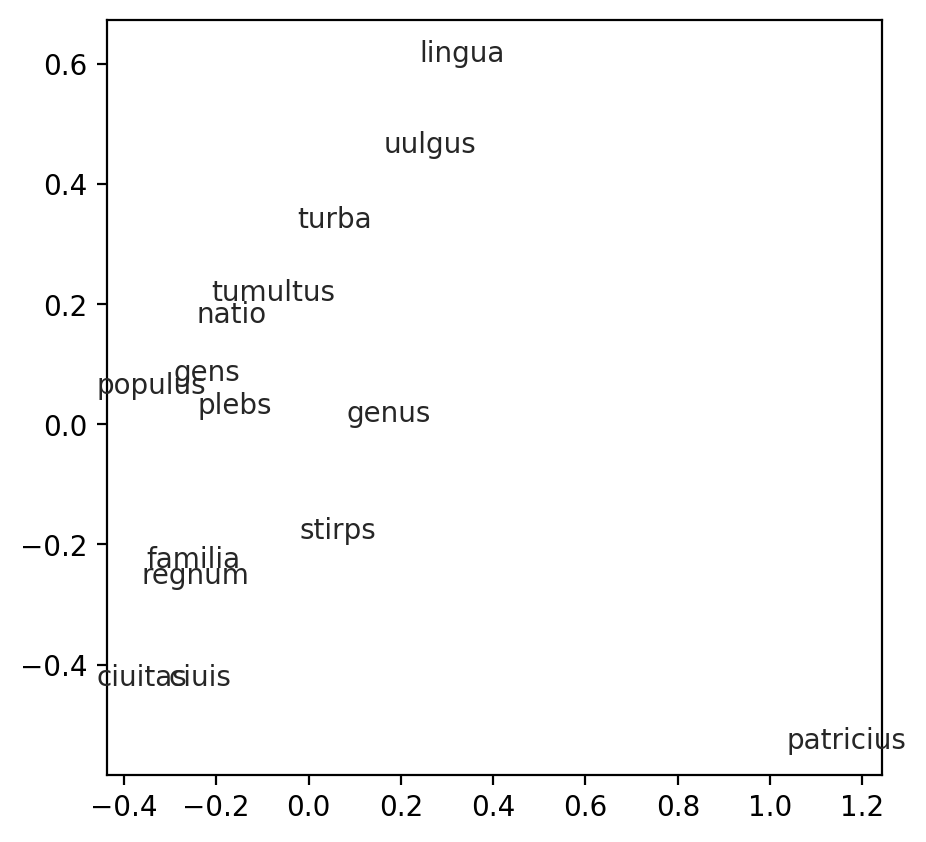

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Figure object with the desired size
fig = plt.figure(dpi=200, figsize=(5, 5))

# Create the scatter plot using seaborn, passing the Figure object as the "figure" parameter
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                     figure=fig, s = 0)

# Turn off the axes
#ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")

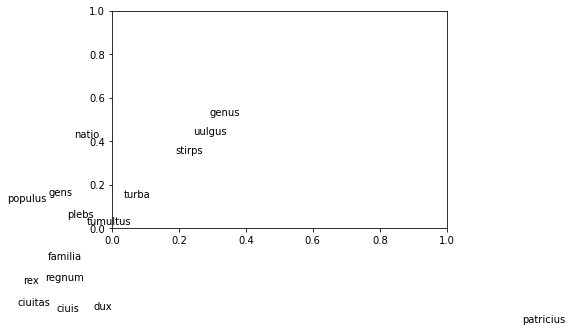

In [ ]:
import matplotlib.pyplot as plt

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
for word, vec in zip(words, word_vectors_2d):
    plt.text(vec[0], vec[1], word)
plt.show()

To create a more informative scatter plot, you can try using a library such as seaborn that provides more advanced plotting functions.

One option is to use the scatterplot function from seaborn, which allows you to specify additional parameters such as the size and color of the points. For example:

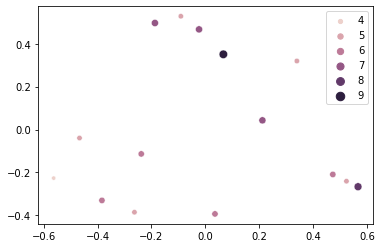

In [ ]:
import seaborn as sns

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                size=[len(word) for word in words], hue=[len(word) for word in words])


This will create a scatter plot with the size and color of the points indicating the length of the corresponding word.

Another option is to use the relplot function, which allows you to create a scatter plot with additional features such as a trend line or a regression model. For example:

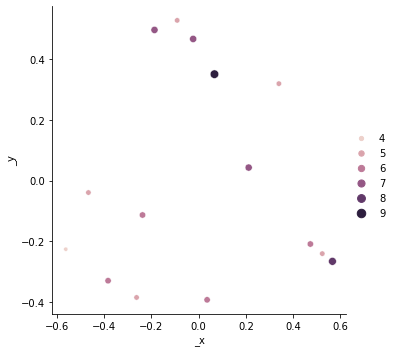

In [ ]:
import seaborn as sns

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
sns.relplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
            size=[len(word) for word in words], hue=[len(word) for word in words],
            kind="scatter")


To add labels to the points on a scatter plot, you can use the text function from matplotlib.

For example, assuming that you have already created a scatter plot using seaborn, you can add labels to the points as follows:



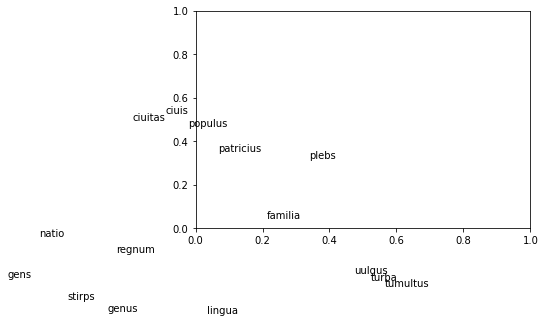

In [ ]:
import matplotlib.pyplot as plt

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
for word, vec in zip(words, word_vectors_2d):
    plt.text(vec[0], vec[1], word)


This will add the labels to the points on the scatter plot.

Alternatively, if you are using the scatterplot function from seaborn, you can use the hue parameter to specify the labels for the points. For example:

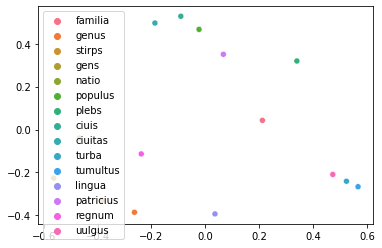

In [ ]:
import seaborn as sns

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                hue=words)


To add labels to the points on a scatter plot directly, you can use the annotate function from matplotlib.

For example, assuming that you have already created a scatter plot using seaborn, you can add labels to the points as follows:

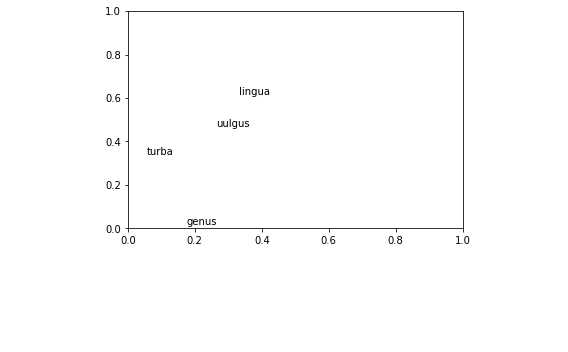

In [ ]:
import matplotlib.pyplot as plt

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
for word, vec in zip(words, word_vectors_2d):
    plt.annotate(word, vec)

This will add the labels to the points on the scatter plot directly.

Alternatively, if you are using the scatterplot function from seaborn, you can use the hue parameter to specify the labels for the points. For example:

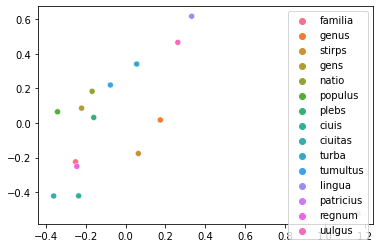

In [ ]:
import seaborn as sns

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                hue=words)

To add labels to the points on a scatter plot using seaborn, you can use the text function from matplotlib in combination with the axes_style and set_axis_off functions from seaborn.

For example:


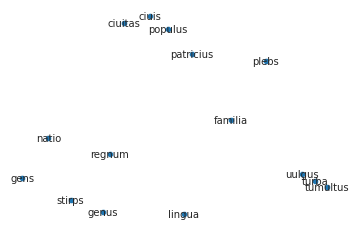

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors

# Create the scatter plot using seaborn
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d])

# Turn off the axes
ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")


To make a scatter plot bigger in matplotlib, you can use the figure function to create a Figure object and set the figsize parameter to specify the size of the figure. You can then pass this Figure object to the plotting function as the figure parameter.

For example, to create a scatter plot with seaborn with a width of 10 inches and a height of 5 inches, you can do the following:

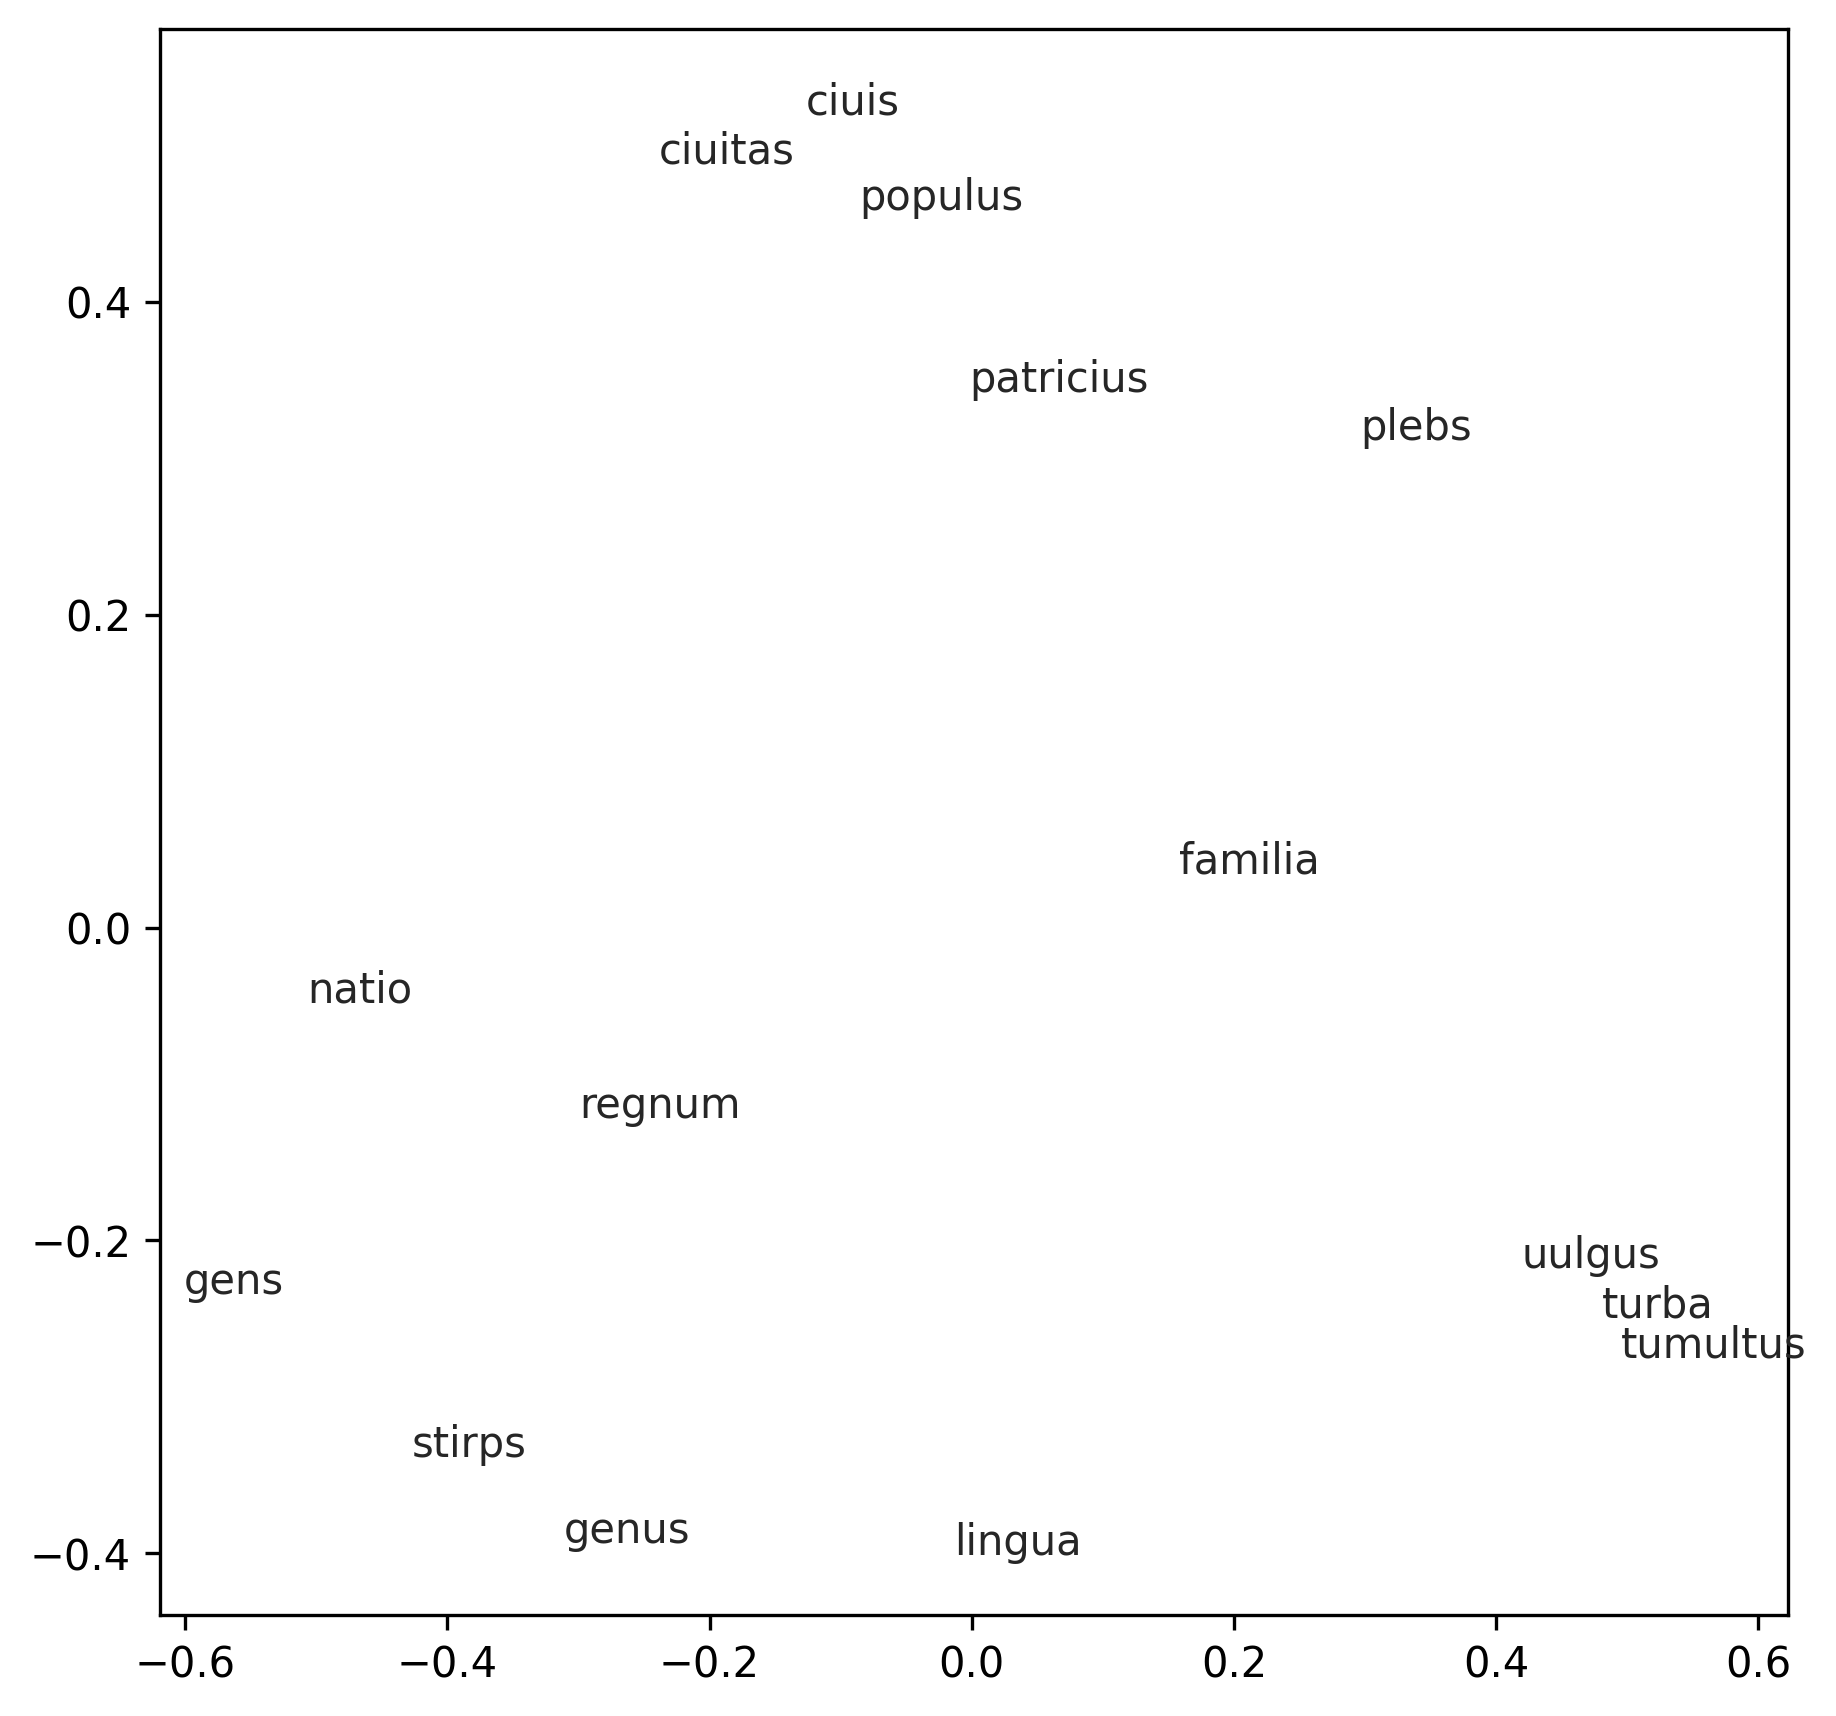

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Figure object with the desired size
fig = plt.figure(dpi=300, figsize=(7, 7))

# Create the scatter plot using seaborn, passing the Figure object as the "figure" parameter
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                     figure=fig, s = 0)

# Turn off the axes
#ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")

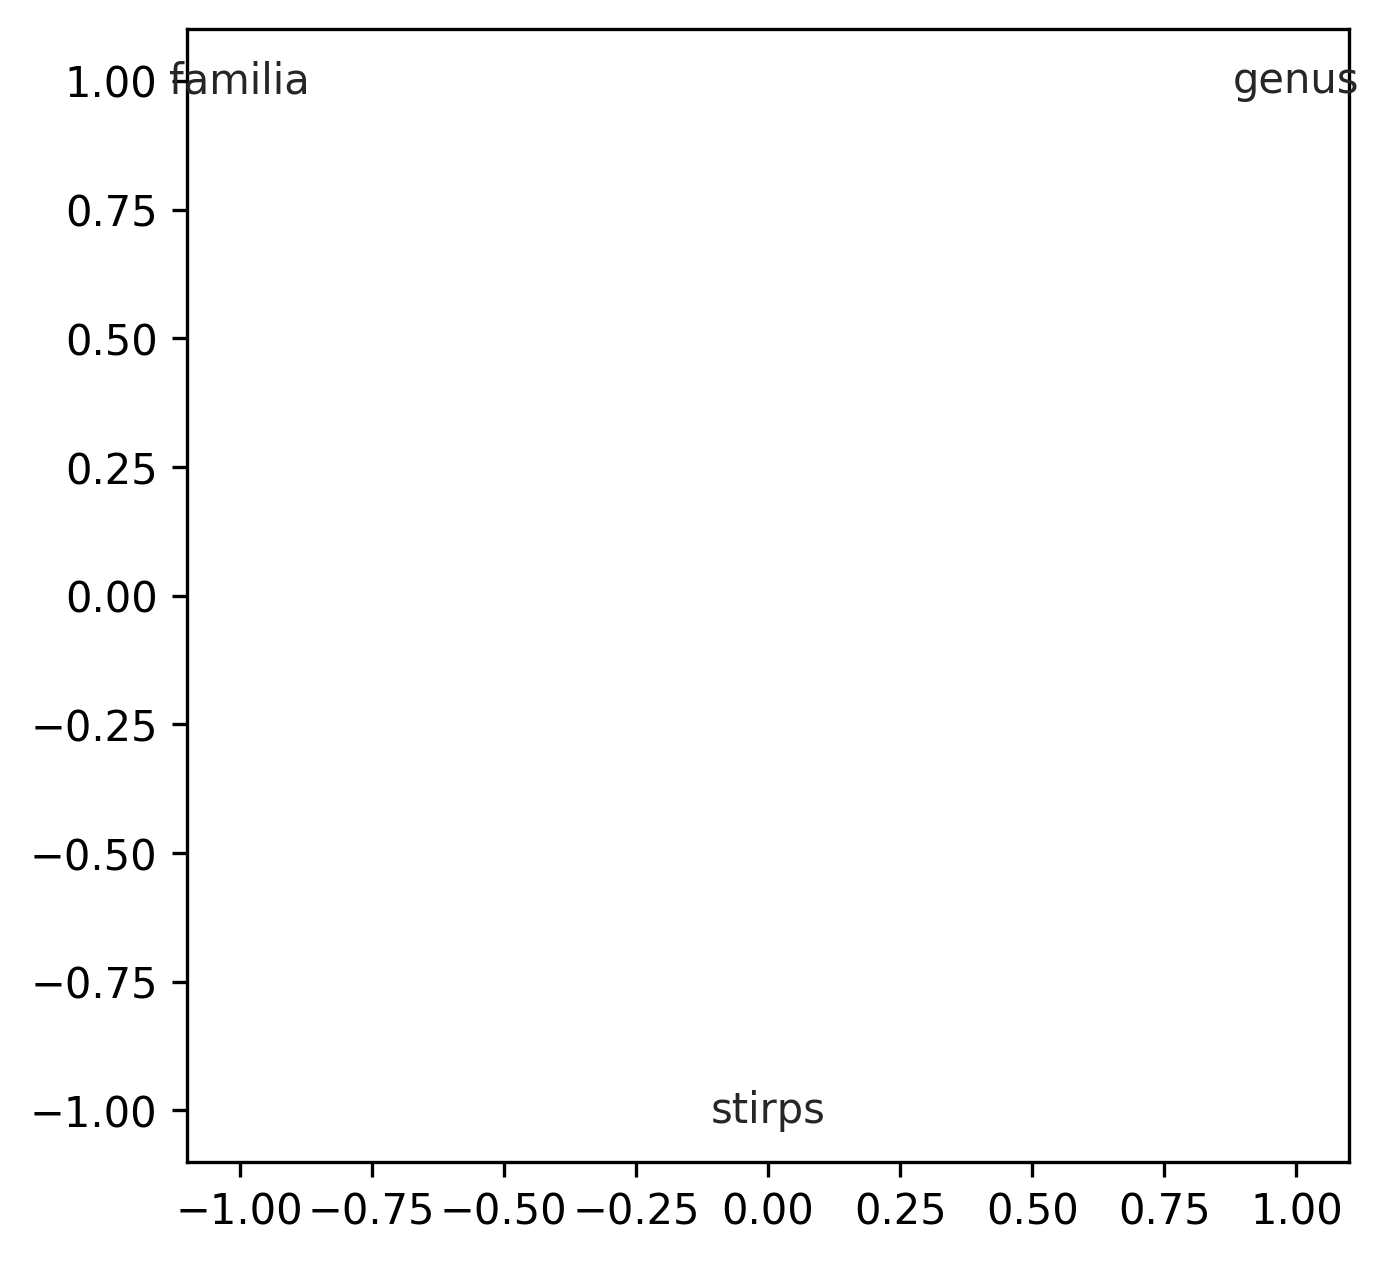

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the list of words and their corresponding 2D vectors
words = ["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]

word_vectors_2d = [[-1, 1], [1, 1], [0, -1]]

# Create a Figure object with the desired size
fig = plt.figure(dpi=300, figsize=(5, 5))

# Create the scatter plot using seaborn, passing the Figure object as the "figure" parameter
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                     figure=fig, s = 0)

# Turn off the axes
#ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")

plt.show()


To visualize a specific set of words in a word embedding model with t-SNE, you can use the following steps:

Load the word embedding model using the gensim library.
Select the vectors for the words you want to visualize.
Compute the t-SNE embeddings using the TSNE class from the sklearn.manifold module.
Use the pyplot module from matplotlib to plot the t-SNE embeddings.
Here is an example code that demonstrates how to visualize the words "gens", "natio", and "populus" in a Word2Vec model with t-SNE:

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


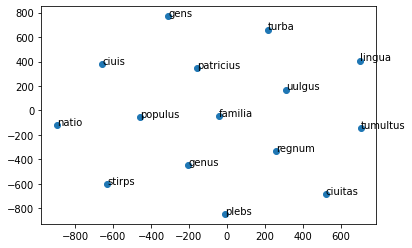

In [ ]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the word embedding model
# model = gensim.models.KeyedVectors.load_word2vec_format('OperaLatina.vec.txt')

model = model_1
#model = model_2

# Select the vectors for the words "gens", "natio", and "populus"
vectors = model[["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]]

# Compute the t-SNE embeddings
tsne = TSNE(n_components=2)
embeddings = tsne.fit_transform(vectors)

# Get the word labels
labels = ["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]

# Plot the t-SNE embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1])
for i, label in enumerate(labels):
  plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]))
plt.show()


This code will display a scatter plot of the t-SNE embeddings for the selected words, with each point representing a word in the vocabulary. You can use the annotate function from pyplot to add the word labels to the plot.

You can also use the x and y parameters of the scatter function to customize the appearance of the plot, and the fontsize parameter of the annotate function to adjust the size of the word labels.

For example, to change the marker size and color, and to increase the font size of the word labels, you can use the following code:

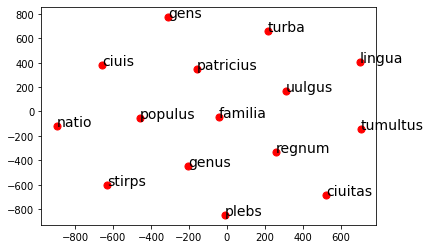

In [ ]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=50, c='red')
for i, label in enumerate(labels):
  plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), fontsize=14)
plt.show()


To visualize a word embedding model with t-SNE, you can use the following steps:

Load the word embedding model using the gensim library.
Compute the t-SNE embeddings using the TSNE class from the sklearn.manifold module.
Use the pyplot module from matplotlib to plot the t-SNE embeddings.
Here is an example code that demonstrates how to visualize a Word2Vec model with t-SNE:

In [ ]:
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the word embedding model
model = gensim.models.KeyedVectors.load_word2vec_format('OperaLatina.vec.txt')

# Compute the t-SNE embeddings
tsne = TSNE(n_components=2)
embeddings = tsne.fit_transform(model.vectors)

# Get the word labels
labels = model.index2word

# Plot the t-SNE embeddings
plt.scatter(embeddings[:, 0], embeddings[:, 1])
for i, label in enumerate(labels):
  plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]))
plt.show()


This code will display a scatter plot of the t-SNE embeddings, with each point representing a word in the vocabulary. You can use the annotate function from pyplot to add the word labels to the plot.

You can also use the x and y parameters of the scatter function to customize the appearance of the plot, and the fontsize parameter of the annotate function to adjust the size of the word labels.

For example, to change the marker size and color, and to increase the font size of the word labels, you can use the following code:

In [ ]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], s=50, c='red')
for i, label in enumerate(labels):
  plt.annotate(label, (embeddings[i, 0], embeddings[i, 1]), fontsize=14)
plt.show()


# Тензор

https://medium.com/mlearning-ai/nlp-day-27-how-to-visualize-word-embeddings-with-tensorboard-e69f39707d64

https://towardsdatascience.com/how-to-visualize-text-embeddings-with-tensorboard-47e07e3a12fb

# Пока оставляем

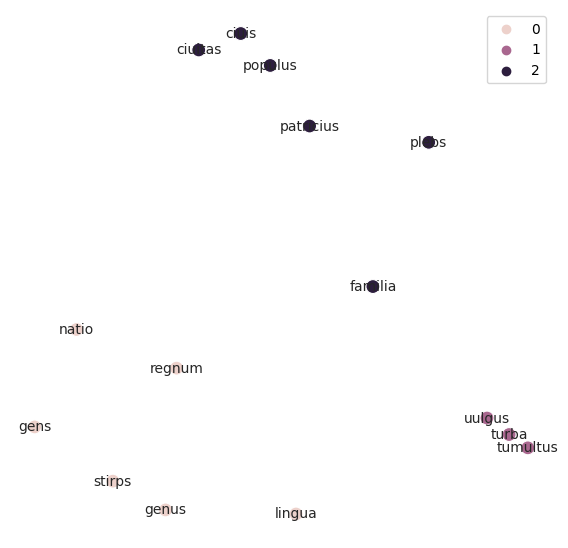

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Figure object with the desired size
fig = plt.figure(dpi=100, figsize=(7, 7))

# Create the scatter plot using seaborn, passing the Figure object as the "figure" parameter
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                     figure=fig, hue=clusters, s = 100)

# Turn off the axes
ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")


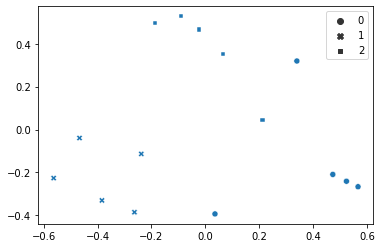

In [ ]:
import seaborn as sns

# Assume that "word_vectors_2d" is a list of 2D word vectors and "clusters" is a list of cluster labels
sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                style=clusters)

To save a plot as an image in matplotlib, you can use the savefig function.

For example, to save the plot as a PNG image, you can do the following:

In [ ]:
import matplotlib.pyplot as plt

# Save the plot as a PNG image
plt.savefig("plot.png")


<Figure size 432x288 with 0 Axes>

This will save the plot to a file called "plot.png" in the current working directory.

You can also specify the width and height of the image in inches using the dpi and figsize parameters. For example:

In [ ]:
import matplotlib.pyplot as plt

# Save the plot as a PNG image with a width of 10 inches and a height of 5 inches
# This will save the plot as a PNG image with a width of 3000 pixels and a height of 1500 pixels (assuming a DPI of 300).
plt.savefig("plot.png", dpi=300, figsize=(10, 10))


<Figure size 432x288 with 0 Axes>

To cluster the words on a scatter plot, you can use a clustering algorithm such as k-means.

To do this, you will first need to obtain the word vectors for the words that you want to cluster. You can use the word_vec method of the word2vec model to retrieve the word vectors. For example:


In [ ]:
import numpy as np

# Assume that "model" is a word2vec model and "words" is a list of words
word_vectors = np.array([model_1.word_vec(word) for word in words])


Next, you can use the KMeans class from sklearn to cluster the word vectors. For example:

In [ ]:
from sklearn.cluster import KMeans

num_clusters=3
# Assume that "num_clusters" is the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(word_vectors)


This will assign each word to a cluster based on its word vector. The cluster labels are stored in the clusters array.

Finally, you can use the cluster labels to color the points on the scatter plot. For example:

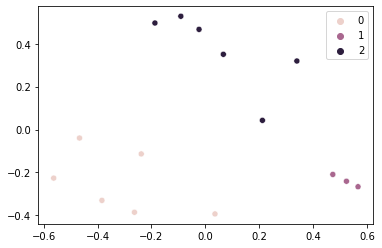

In [ ]:
import seaborn as sns

# Assume that "word_vectors_2d" is a list of 2D word vectors
sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d],
                hue=clusters)


There are several methods that you can use to determine the right number of clusters for your data.

One common method is the elbow method, which involves fitting the model for different values of the number of clusters and selecting the value that results in the "elbow" of the plot of the sum of squared distances from the points to the nearest cluster center.

To use the elbow method with the KMeans class from sklearn, you can do the following:

Text(0, 0.5, 'Sum of squared distances')

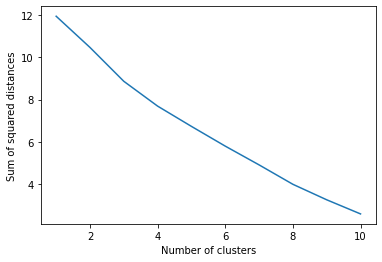

In [ ]:
from sklearn.cluster import KMeans

# Assume that "word_vectors" is a list of word vectors

# Create an empty list to store the sum of squared distances for each value of k
sse = []

# Fit the KMeans model for values of k from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(word_vectors)
    sse.append(kmeans.inertia_)

# Plot the sum of squared distances
plt.plot(range(1, 11), sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")


Text(0, 0.5, 'Sum of squared distances')

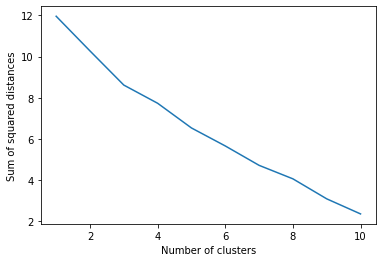

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume that "word_vectors" is a list of word vectors

# Create a list of values for the number of clusters
num_clusters = list(range(1, 11))

# Compute the within-cluster sum of squares for each value of n_clusters
inertias = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(word_vectors)
    inertias.append

# Plot the sum of squared distances
plt.plot(range(1, 11), sse)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squared distances")

If the elbow method does not give a clear indication of the optimal number of clusters, you can try using other methods to determine the number of clusters.

One method is the silhouette analysis, which involves computing the silhouette score for each point in the dataset for a range of values for the number of clusters. The silhouette score is a measure of how well-separated the points in a cluster are from the points in other clusters, with a score closer to 1 indicating a more well-separated cluster. The optimal number of clusters is often considered to be the number of clusters that gives the highest average silhouette score.

To implement silhouette analysis in Python, you can use the silhouette_score function from sklearn.metrics and compute the silhouette score for each value of n_clusters. For example:


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assume that "word_vectors" is a list of word vectors

# Create a list of values for the number of clusters
num_clusters = list(range(2, 11))

# Compute the silhouette score for each value of n_clusters
silhouette_scores = []
for n in num_clusters:
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(word_vectors)
    silhouette_scores.append(silhouette_score(word_vectors, clusters))


This will compute the silhouette score for each value of n_clusters and store the scores in the silhouette_scores list.

You can then plot the silhouette scores using matplotlib to visualize the results. For example:

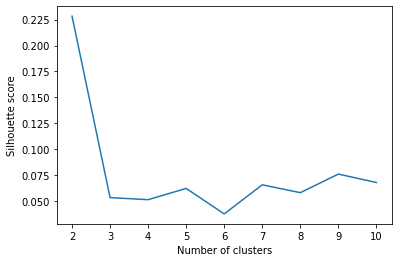

In [ ]:
import matplotlib.pyplot as plt

# Plot the silhouette scores
plt.plot(num_clusters, silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.show()


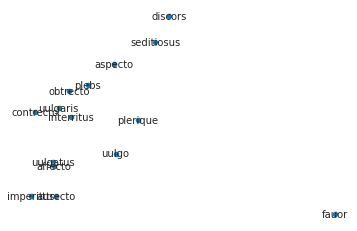

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors

# Create the scatter plot using seaborn
ax = sns.scatterplot(x=[vec[0] for vec in word_vectors_2d], y=[vec[1] for vec in word_vectors_2d])

# Turn off the axes
ax.set_axis_off()

# Add the labels using matplotlib
with sns.axes_style("white"):
    for word, vec in zip(words, word_vectors_2d):
        plt.text(vec[0], vec[1], word, ha="center", va="center")

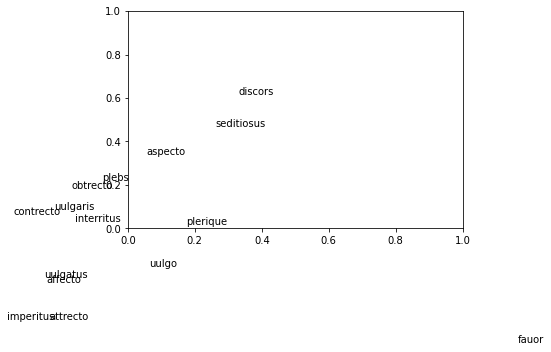

In [ ]:
import matplotlib.pyplot as plt

# Assume that "words" is a list of words and "word_vectors_2d" is a list of 2D word vectors
for word, vec in zip(words, word_vectors_2d):
    plt.text(vec[0], vec[1], word)


образцы
Gensim Word2Vec Tutorial
https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial/notebook

NLP+CSS 201 Tutorials
https://nlp-css-201-tutorials.github.io/nlp-css-201-tutorials/




Ниже по образцу визуализации

https://github.com/sismetanin/word2vec-tsne

https://github.com/sismetanin/word2vec-tsne/blob/master/Visualizing%20Word2Vec%20Word%20Embeddings%20using%20t-SNE.ipynb

In [ ]:
model_gn = model_1
# keys = ["familia", "genus", "stirps", "gens", "natio", "populus", "plebs", "ciuis", "ciuitas", "turba", "tumultus", "lingua", "patricius", "regnum", "uulgus"]
keys = ["gens", "natio", "populus", "uulgus"]
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


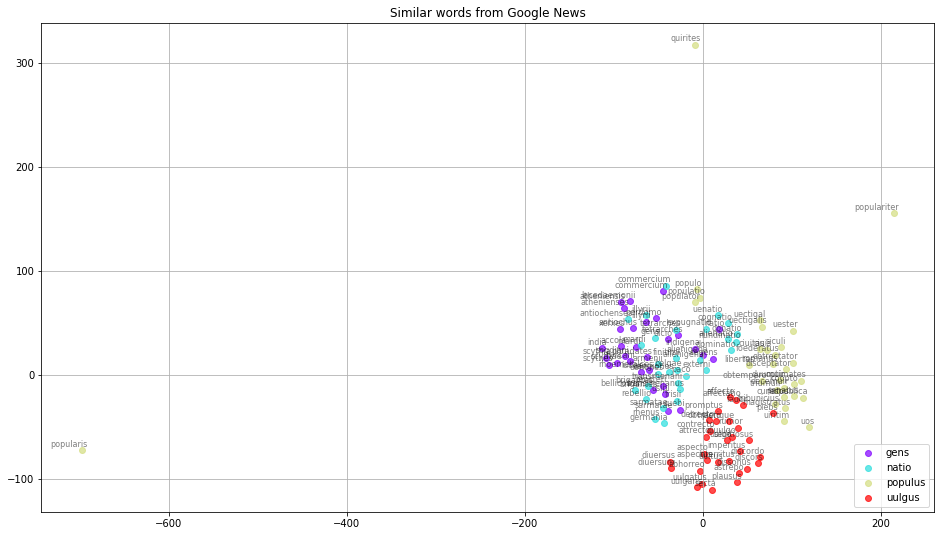

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=250, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

In [ ]:
model_wp = model_2

In [ ]:
words_wp = []
embeddings_wp = []
for word in list(model_wp.wv.vocab):
    embeddings_wp.append(model_wp.wv[word])
    words_wp.append(word)
    
tsne_wp_3d = TSNE(perplexity=30, n_components=3, init='pca', n_iter=3500, random_state=12)
embeddings_wp_3d = tsne_wp_3d.fit_transform(embeddings_wp)

<ipython-input-6-e32be647a565>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  for word in list(model_wp.wv.vocab):
<ipython-input-6-e32be647a565>:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  embeddings_wp.append(model_wp.wv[word])
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


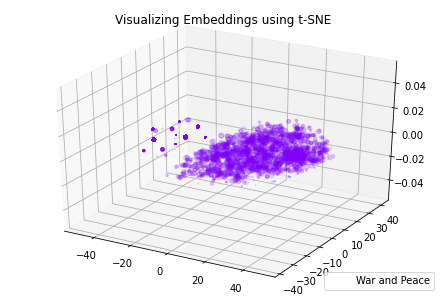

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


def tsne_plot_3d(title, label, embeddings, a=1):
    fig = plt.figure()
    ax = Axes3D(fig)
    colors = cm.rainbow(np.linspace(0, 1, 1))
    plt.scatter(embeddings[:, 0], embeddings[:, 1], embeddings[:, 2], c=colors, alpha=a, label=label)
    plt.legend(loc=4)
    plt.title(title)
    plt.show()


tsne_plot_3d('Visualizing Embeddings using t-SNE', 'War and Peace', embeddings_wp_3d, a=0.1)

In [ ]:
# Compare the vectors for the word "text" in each of the models
vec1 = model_1.wv['rex']
vec2 = model_2.wv['rex']
similarity = model_1.similarity(vec1, vec2)

print(similarity)

<ipython-input-10-7ac973f6c562>:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vec1 = model_1.wv['rex']
<ipython-input-10-7ac973f6c562>:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  vec2 = model_2.wv['rex']


KeyError: ignored

In [ ]:
sims = model_1.wv.most_similar('gens', topn=10)
print(sims)

[('regens', 0.6138488054275513), ('scythae', 0.5793613195419312), ('natio', 0.5635300278663635), ('mardi', 0.5634660124778748), ('illyrii', 0.5383574962615967), ('iudaei', 0.5338514447212219), ('alienigena', 0.5225402116775513), ('sarmatae', 0.5208836793899536), ('brigantes', 0.5183442234992981), ('perdomo', 0.5178052186965942)]


<ipython-input-8-7be645d62e9e>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  sims = model_1.wv.most_similar('gens', topn=10)


In [ ]:
sims = model_2.wv.most_similar('gens', topn=10)
print(sims)

[('iudaicus', 0.569577693939209), ('gentilis', 0.5592577457427979), ('iudaeus', 0.5586758852005005), ('natio', 0.5583958625793457), ('primitiuus', 0.5581321716308594), ('gentilitas', 0.5195542573928833), ('disperdo', 0.5178202390670776), ('princeps', 0.517543375492096), ('alienigenus', 0.5008281469345093), ('lex', 0.5007472038269043)]


<ipython-input-9-64063fad740f>:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  sims = model_2.wv.most_similar('gens', topn=10)


In [ ]:
# Access vectors for specific words with a keyed lookup:
vector = model_1['gens']
# see the shape of the vector (300,)
vector.shape

# Processing sentences is not as simple as with Spacy:
#vectors = [model[x] for x in "This is some text I am processing with Spacy".split(' ')]

(100,)